# Photon Attenuation Data Analysis
### By Xavier Moskala exm413@case.edu

In [6]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin

In [7]:
# Make a list of lines on .spe files to be ignored
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]

# Useful helper functions
## Reads multiple files
def read_multi_csv(start_sample,end_sample,path):     
    samples = list(range(start_sample,end_sample+1))     
    dfs = []
    for N in samples:         
        file = 'https://gitlab.com/xmoskala/labdata/-/raw/main/photonlab'+path+str(N)+'.SPE'  
        file = file.replace(" ", "%20")
        #print (file)         
        df = pd.read_csv(file, skiprows=skip, header=0, names=["Data"])         
        dfs.append(df) 
    return dfs
## Averages the multiple files read
def aver(files):
    sample = files[0]
    for i in range(len(files)):
        sample = sample.add(files[i], axis=0)
    sample = sample.div(len(files)).add(0.5).astype(int)
    return sample

In [8]:
def url(path):
    path = 'https://gitlab.com/xmoskala/labdata/-/raw/main/photonlab'+path+'000.SPE'
    path = path.replace(" ", "%20")
    return path
BgO = pd.read_csv(url("/9-27-22/Background"), skiprows=skip, header=0, names=["Data"])  
BaL = pd.read_csv(url("/9-27-22/Ba"), skiprows=skip, header=0, names=["Data"])  
BaH = pd.read_csv(url("/9-27-22/BaH"), skiprows=skip, header=0, names=["Data"])  
BaAlH = pd.read_csv(url("/9-27-22/BaAlH"), skiprows=skip, header=0, names=["Data"])  
BaAlL = pd.read_csv(url("/9-27-22/BaAlL"), skiprows=skip, header=0, names=["Data"])  
BaColH = pd.read_csv(url("/9-27-22/BaColH"), skiprows=skip, header=0, names=["Data"])  
BaColM = pd.read_csv(url("/9-27-22/BaColM"), skiprows=skip, header=0, names=["Data"])   
BaColL = pd.read_csv(url("/9-27-22/BaColL"), skiprows=skip, header=0, names=["Data"])  
BaPbH = pd.read_csv(url("/9-27-22/BaPbH"), skiprows=skip, header=0, names=["Data"])  
BaPbL = pd.read_csv(url("/9-27-22/BaPbL"), skiprows=skip, header=0, names=["Data"])  


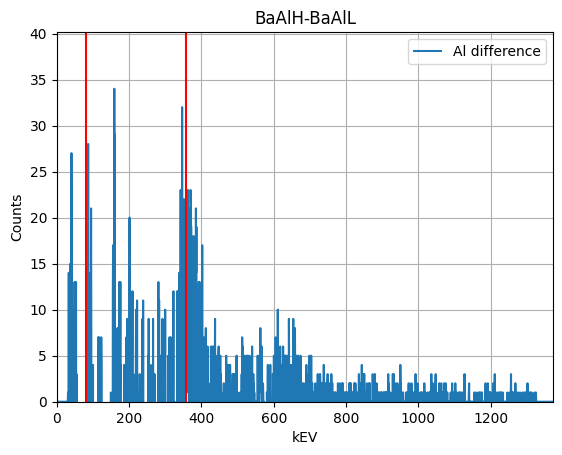

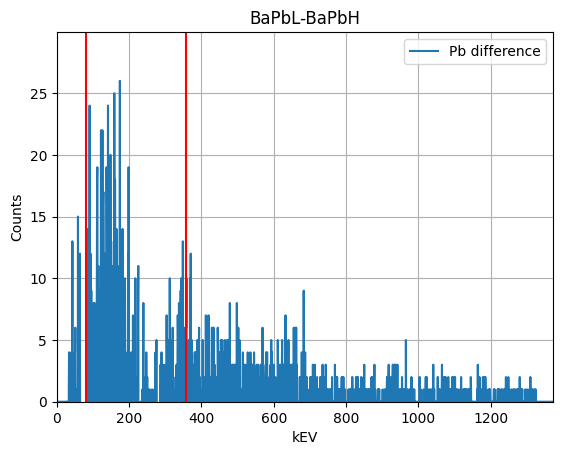

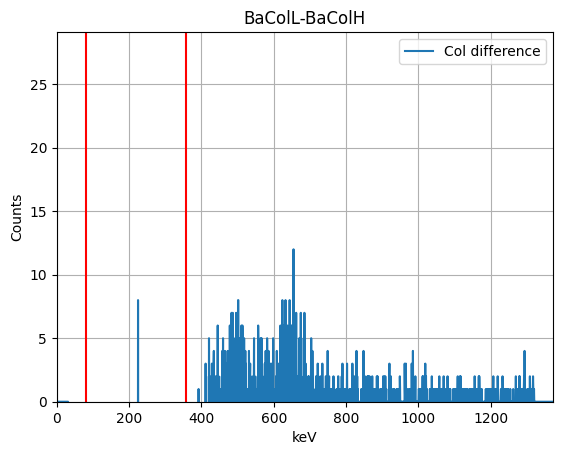

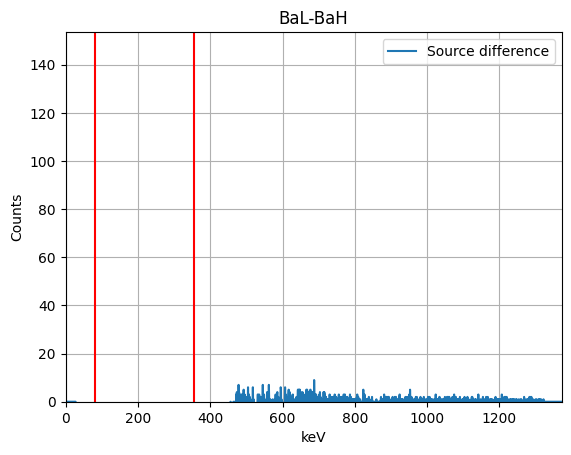

In [9]:
#Plot Barium Data
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
#ax.plot(BgO, label="Bg")
#ax.plot(BaH, label="BaH")
#ax.plot(BaL, label="BaL")
#ax.plot(BaAlH, label="AlH")
#ax.plot(BaAlL, label="AlL")
#ax.plot(BaColH, label="ColH")
#ax.plot(BaColM, label="ColM")
#ax.plot(BaColL, label="ColL")
#ax.plot(BaPbH, label="PbH")
#ax.plot(BaPbL, label="PbL")

Babin = 0.67 # Bin size from calibration on Maestro
Bax = np.arange(0,2048,Babin)[0:len(BaL)]

ax.plot(Bax, BaAlH-BaAlL, label="Al difference")
ax.set_xlim(0,Babin*len(BaL))
ax.set_ylim(0)
ax.set(xlabel='kEV', ylabel='Counts', title='BaAlH-BaAlL')
ax.grid()
ax.legend()
ax.axvline(81, color='r')
ax.axvline(356, color='r')

ax1.plot(Bax, BaPbL-BaPbH, label="Pb difference")
ax1.set_xlim(0,Babin*len(BaL))
ax1.set_ylim(0)
ax1.set(xlabel='kEV', ylabel='Counts', title='BaPbL-BaPbH')
ax1.grid()
ax1.legend()
ax1.axvline(81, color='r')
ax1.axvline(356, color='r')

ax2.plot(Bax, (BaColH-BaColL), label="Col difference")
ax2.set_xlim(0,Babin*len(BaL))
ax2.set_ylim(0)
ax2.set(xlabel='keV', ylabel='Counts', title='BaColL-BaColH')
ax2.grid()
ax2.legend()
ax2.axvline(81, color='r')
ax2.axvline(356, color='r')

ax3.plot(Bax, BaL-BaH, label="Source difference")
ax3.set_xlim(0,Babin*len(BaL))
ax3.set_ylim(0)
ax3.set(xlabel='keV', ylabel='Counts', title='BaL-BaH')
ax3.grid()
ax3.legend()
ax3.axvline(81, color='r')
ax3.axvline(356, color='r')

plt.show()

In [10]:
# Read spectrum files (.spe) as .csv with pandas



## Number of samples to average through (Co & Ba have 5 trials [0-4] so it is by default set to 4)
endnumber = 4

## Cesium(Cs) Readings
### Cs Background(Bg)
CsBgFiles=read_multi_csv(0,endnumber,"/9-15-22/Background/Background00")    #Read files
CsBg = aver(CsBgFiles)    #Average

### Cs 
CsFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs/Cs00")    #Read files
Cs = aver(CsFiles)    #Average

### Cs Al
CsAlFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Alu/Cs Alu00")    #Read files
CsAl = aver(CsAlFiles)    #Average

### Cs Cu
CsCuFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Cu/Cs Cu00")    #Read files
CsCu = aver(CsCuFiles)    #Average

### Cs Pb
CsPbFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Pb/Cs Pb00")    #Read files
CsPb = aver(CsPbFiles)    #Average

## Barium(Ba) Readings
### Ba Background(Bg)
BaBgFiles=read_multi_csv(0,endnumber,"/9-20-22/Background/Background00")    #Read files
BaBg = aver(BaBgFiles)    #Average

### Ba 
BaFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba/Ba00")    #Read files
Ba = aver(BaFiles)    #Average

### Ba Al
BaAlFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Alu/Ba Alu00")    #Read files
BaAl = aver(BaAlFiles)    #Average

### Ba Cu
BaCuFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Cu/Ba Cu00")    #Read files
BaCu = aver(BaCuFiles)    #Average

### Ba Pb
BaPbFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Pb/Ba Pb00")    #Read files
BaPb = aver(BaPbFiles)    #Average

## Cobalt(Co) Readings
### Co Background(Bg)
CoBgFiles=read_multi_csv(0,endnumber,"/9-22-22/Background/Background00")    #Read files
CoBg = aver(CoBgFiles)    #Average

### Co 
CoFiles=read_multi_csv(0,endnumber,"/9-22-22/Co/Co00")    #Read files
Co = aver(CoFiles)    #Average

### Co Al
CoAlFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Alu/Co Alu00")    #Read files
CoAl = aver(CoAlFiles)    #Average

### Co Cu
CoCuFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Cu/Co Cu00")    #Read files
CoCu = aver(CoCuFiles)    #Average

### Co Pb
CoPbFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Pb/Co Pb00")    #Read files
CoPb = aver(CoPbFiles)    #Average



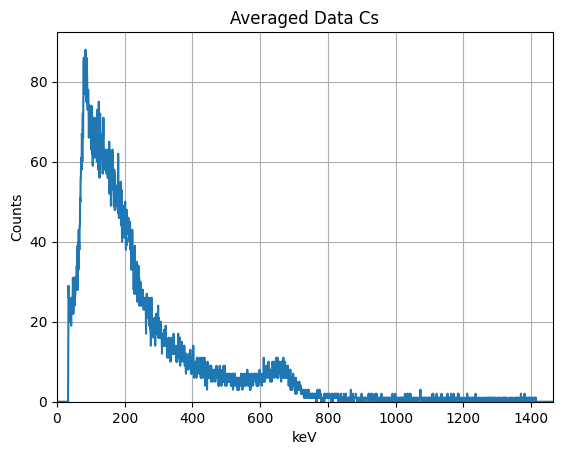

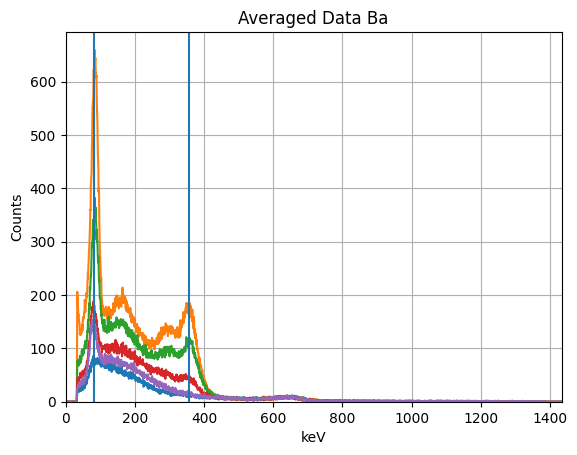

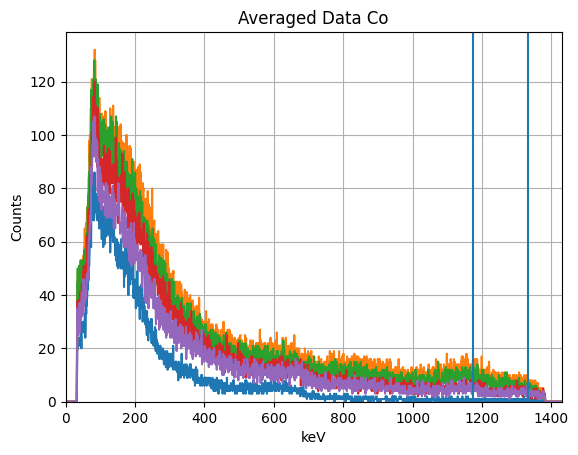

In [11]:
#Plot Cesium Data
Csbin = 0.715 # Bin size from calibration on Maestro
Csx = np.arange(0,2048,Csbin)[0:len(Cs)]
fig, ax = plt.subplots()
ax.plot(Csx, CsBg, label="Cs")
ax.plot(Csx, Cs, label="Cs")
ax.plot(Csx, CsAl, label="Cs")
ax.plot(Csx, CsCu, label="Cs")
ax.plot(Csx, CsPb, label="Cs")
ax.axvline(662)

plt.xlim(0,Csbin*len(Cs))
plt.ylim(0)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data Cs')
ax.grid()
#ax.legend()

#Plot Barium Data
Babin = 0.70 # Bin size from calibration on Maestro
Bax = np.arange(0,2048,Babin)[0:len(Ba)]
fig, ax = plt.subplots()
ax.plot(Bax, BaBg, label="Cs")
ax.plot(Bax, Ba, label="Cs")
ax.plot(Bax, BaAl, label="Cs")
ax.plot(Bax, BaCu, label="Cs")
ax.plot(Bax, BaPb, label="Cs")
ax.axvline(81)
ax.axvline(356)

plt.xlim(0,Babin*len(Ba))
plt.ylim(0)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data Ba')
ax.grid()
#ax.legend()

#Plot Co Data
Cobin = 0.698 # Bin size from calibration on Maestro
Cox = np.arange(0,2048,Cobin)[0:len(Co)]
fig, ax = plt.subplots()
ax.plot(Cox, CoBg, label="Cs")
ax.plot(Cox, Co, label="Cs")
ax.plot(Cox, CoAl, label="Cs")
ax.plot(Cox, CoCu, label="Cs")
ax.plot(Cox, CoPb, label="Cs")
ax.axvline(1173)
ax.axvline(1332)


plt.xlim(0,Cobin*len(Co))
plt.ylim(0)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data Co')
ax.grid()
#ax.legend()

plt.show()

In [12]:
# define a helper function to get the counts within the fwhm
def stats(b1,b2,spe, bg, spex, fwhm):
        b1 = int(b1/Csbin+0.5)
        b2 = int(b2/Csbin+0.5)
        dif=(spe-bg)[b1:b2]
        difx=spex[b1:b2]
        #mean, std = norm.fit(dif)
        #fwhm = 2*np.sqrt(2*np.exp(2))*std
        maxc = int(np.max(dif))
        xmax = int(np.average(np.where(dif==maxc)[0])+0.5)
        peakx = int(difx[xmax])
        #print(np.concatenate(np.array(dif[int(xmax-fwhm):int(xmax+fwhm)])))
        counts = int(np.sum(dif[int(xmax-fwhm):int(xmax+fwhm)]))
        #plt.plot(difx, dif)
        #plt.axvline(x=peakx+fwhm)
        #plt.axvline(x=peakx-fwhm)
        print(counts)
        return counts

#Cesium 
Csb1=550
Csb2=800
Csfwhm=10 #ROI
##[No Absorber]
Csc = stats(Csb1,Csb2,Cs,CsBg,Csx, Csfwhm)
##[Al]
CsAlc = stats(Csb1,Csb2,CsAl,CsBg,Csx, Csfwhm)
##[Cu]
CsCuc = stats(Csb1,Csb2,CsCu,CsBg,Csx, Csfwhm)
##[Pb]
CsPbc = stats(Csb1,Csb2,CsPb,CsBg,Csx, Csfwhm)
print("--")
#Ba
Bab1=50
Bab2=140
Bab3=320
Bab4=390
Bafwhm=4 #ROI
##[No Absorber]
Bac1 = stats(Bab1,Bab2,Ba,BaBg,Bax, Bafwhm)
Bac2 = stats(Bab3,Bab4,Ba,BaBg,Bax, Bafwhm)
##[Al]
BaAlc1 = stats(Bab1,Bab2,BaAl,BaBg,Bax, Bafwhm)
BaAlc2 = stats(Bab3,Bab4,BaAl,BaBg,Bax, Bafwhm)
##[Cu]
BaCuc1 = stats(Bab1,Bab2,BaCu,BaBg,Bax, Bafwhm)
BaCuc2 = stats(Bab3,Bab4,BaCu,BaBg,Bax, Bafwhm)
##[Pb]
BaPbc1 = stats(Bab1,Bab2,BaPb,BaBg,Bax, Bafwhm)
BaPbc2 = stats(Bab3,Bab4,BaPb,BaBg,Bax, Bafwhm)
print("--")
#Co
Cob1=1000
Cob2=1200
Cob3=1270
Cob4=1450
Cofwhm=6 #ROI
##[No Absorber]
Coc1 = stats(Cob1,Cob2,Co,CoBg,Cox, Cofwhm)
Coc2 = stats(Cob3,Cob4,Co,CoBg,Cox, Cofwhm)
##[Al]
CoAlc1 = stats(Cob1,Cob2,CoAl,CoBg,Cox, Cofwhm)
CoAlc2 = stats(Cob3,Cob4,CoAl,CoBg,Cox, Cofwhm)
##[Cu]
CoCuc1 = stats(Cob1,Cob2,CoCu,CoBg,Cox, Cofwhm)
CoCuc2 = stats(Cob3,Cob4,CoCu,CoBg,Cox, Cofwhm)
##[Pb]
CoPbc1 = stats(Cob1,Cob2,CoPb,CoBg,Cox, Cofwhm)
CoPbc2 = stats(Cob3,Cob4,CoPb,CoBg,Cox, Cofwhm)


233
127
60
36
--
4431
1291
2233
746
773
261
474
22
--
146
98
104
73
50
38
62
41


/home/xavier/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [9]:
#Chi Values
xAl = 6.3
xCu = 19
xPb = 24
#define a function to calculate mu
def mu(chi, S, I):
    return -np.log(S/I)/chi
#Cesium
print(mu(xAl,CsAlc,Csc))
print(mu(xCu,CsCuc,Csc))
print(mu(xPb,CsPbc,Csc))
print("--")
#Barium1
print(mu(xAl,BaAlc1,Bac1))
print(mu(xCu,BaCuc1,Bac1))
print(mu(xPb,BaPbc1,Bac1))
print("--")
#Barium2
print(mu(xAl,BaAlc2,Bac2))
print(mu(xCu,BaCuc2,Bac2))
print(mu(xPb,BaPbc2,Bac2))
print("--")
#Cobalt1
print(mu(xAl,CoAlc1,Coc1))
print(mu(xCu,CoCuc1,Coc1))
print(mu(xPb,CoPbc1,Coc1))
print("--")
#Cobalt2
print(mu(xAl,CoAlc2,Coc2))
print(mu(xCu,CoCuc2,Coc2))
print(mu(xPb,CoPbc2,Coc2))

0.09632561382652528
0.07140494164966316
0.07781331312956627
--
0.10877449513640185
0.09190008013747723
0.09313221872935053
--
0.08705504613379073
0.08413957808020785
0.16967208072868026
--
0.053843765486819656
0.05639913769895739
0.03568634319430187
--
0.0467473075432033
0.04986217468127296
0.036308142165261


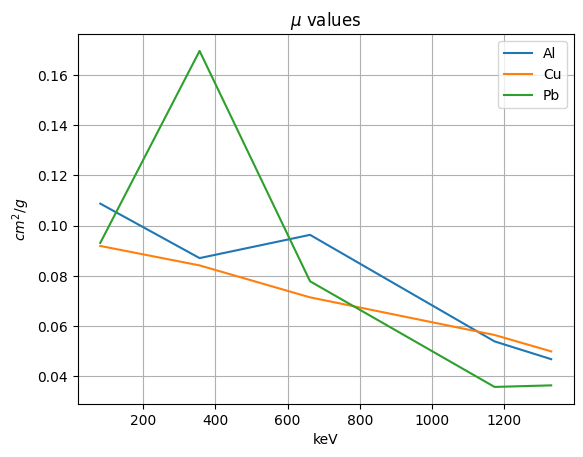

In [113]:
#Plot mu values
xarr = [81,356,662, 1173, 1330]
Alarr = [mu(xAl,BaAlc1,Bac1),mu(xAl,BaAlc2,Bac2), mu(xAl,CsAlc,Csc), mu(xAl,CoAlc1,Coc1), mu(xAl,CoAlc2,Coc2)]
Cuarr = [mu(xCu,BaCuc1,Bac1), mu(xCu,BaCuc2,Bac2), mu(xCu,CsCuc,Csc), mu(xCu,CoCuc1,Coc1), mu(xCu,CoCuc2,Coc2)]
Pbarr = [mu(xPb,BaPbc1,Bac1), mu(xPb,BaPbc2,Bac2), mu(xPb,CsPbc,Csc), mu(xPb,CoPbc1,Coc1), mu(xPb,CoPbc2,Coc2)]
fig, ax = plt.subplots()

ax.plot(xarr, Alarr, label='Al')
ax.plot(xarr, Cuarr, label='Cu')
ax.plot(xarr, Pbarr, label='Pb')

ax.set(xlabel='keV', ylabel='$cm^2/g$',
       title='$\mu$ values')
ax.grid()
ax.legend()

plt.show()

In [135]:
#error
def dmu(mu,S,I,chi):
    da = np.sqrt((np.sqrt(S)/S)**2+(np.sqrt(I)/I)**2)
    term = (da)**2 + (0.1/chi)**2
    sq = np.sqrt(term)
    return mu*sq

#Cesium
print(dmu(mu(xAl,CsAlc,Csc), CsAlc, Csc, xAl))
print(dmu(mu(xCu,CsCuc,Csc), CsCuc, Csc, xCu))
print(dmu(mu(xPb,CsPbc,Csc), CsPbc, Csc, xPb))
print("--")
#Barium1
print(dmu(mu(xAl,BaAlc1,Bac1), BaAlc1, Bac1, xAl))
print(dmu(mu(xCu,BaCuc1,Bac1), BaCuc1, Bac1, xCu))
print(dmu(mu(xPb,BaPbc1,Bac1), BaPbc1, Bac1, xPb))
print("--")
#Barium2
print(dmu(mu(xAl,BaAlc2,Bac2), BaAlc2, Bac2, xAl))
print(dmu(mu(xCu,BaCuc2,Bac2), BaCuc2, Bac2, xCu))
print(dmu(mu(xPb,BaPbc2,Bac2), BaPbc2, Bac2, xPb))
print("--")
#Cobalt1
print(dmu(mu(xAl,CoAlc1,Coc1), CoAlc1, Coc1, xAl))
print(dmu(mu(xCu,CoCuc1,Coc1), CoCuc1, Coc1, xCu))
print(dmu(mu(xPb,CoPbc1,Coc1), CoPbc1, Coc1, xPb))
print("--")
#Cobalt2
print(dmu(mu(xAl,CoAlc2,Coc2), CoAlc2, Coc2, xAl))
print(dmu(mu(xCu,CoCuc2,Coc2), CoCuc2, Coc2, xCu))
print(dmu(mu(xPb,CoPbc2,Coc2), CoPbc2, Coc2, xPb))

0.01073406839654042
0.010344161840542643
0.013938574430745627
--
0.0033090756070397894
0.0036146587638020956
0.004517391150706011
--
0.00423541234053255
0.005727496586217544
0.03648797993665567
--
0.006961616238221488
0.009246193717093726
0.00541159696522047
--
0.00726535946009513
0.009532360988724217
0.006754845325622607


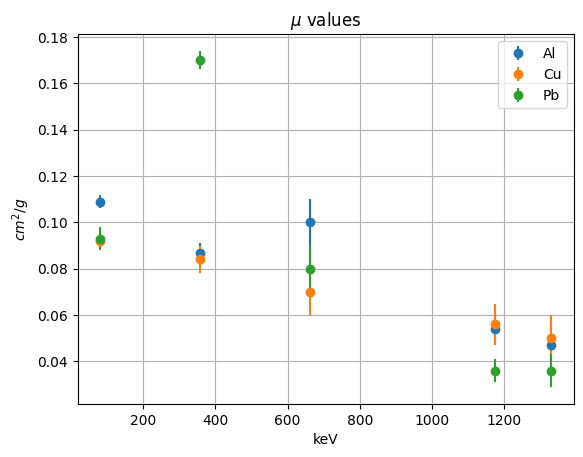

In [138]:
#Plot mu values
xarr = [81,356,662, 1173, 1330]
#Alarr = [mu(xAl,BaAlc1,Bac1),mu(xAl,BaAlc2,Bac2), mu(xAl,CsAlc,Csc), mu(xAl,CoAlc1,Coc1), mu(xAl,CoAlc2,Coc2)]
#Cuarr = [mu(xCu,BaCuc1,Bac1), mu(xCu,BaCuc2,Bac2), mu(xCu,CsCuc,Csc), mu(xCu,CoCuc1,Coc1), mu(xCu,CoCuc2,Coc2)]
#Pbarr = [mu(xPb,BaPbc1,Bac1), mu(xPb,BaPbc2,Bac2), mu(xPb,CsPbc,Csc), mu(xPb,CoPbc1,Coc1), mu(xPb,CoPbc2,Coc2)]
Alarr = [0.109,0.087,0.10,0.054,0.047]
Cuarr = [0.092,0.084,0.07,0.056,0.05]
Pbarr = [0.093,0.17,0.08,0.036,0.036]
Albar = [0.003,0.004,0.01,0.007,0.007]
Cubar = [0.004,0.006,0.01,0.009,0.01]
Pbbar = [0.005,0.004,0.01,0.005,0.007]
fig, ax = plt.subplots()

ax.errorbar(xarr, Alarr, yerr=Albar, fmt='o', label='Al')
ax.errorbar(xarr, Cuarr, yerr=Cubar, fmt='o',label='Cu')
ax.errorbar(xarr, Pbarr, yerr=Pbbar, fmt='o',label='Pb')


ax.set(xlabel='keV', ylabel='$cm^2/g$',
       title='$\mu$ values')
ax.grid()
ax.legend()

plt.show()